In [3]:
import scanpy as sc
import squidpy as sq
import numpy as np
import pandas as pd
from anndata import AnnData
import pathlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import skimage
import seaborn as sns
import tangram as tg

sc.logging.print_header()
print(f"squidpy=={sq.__version__}")

%load_ext autoreload
%autoreload 2
%matplotlib inline

scanpy==1.9.3 anndata==0.9.2 umap==0.5.3 numpy==1.22.4 scipy==1.10.1 pandas==2.0.3 scikit-learn==1.3.0 statsmodels==0.14.0 python-igraph==0.10.6 pynndescent==0.5.10
squidpy==1.2.3


In [2]:
ad_sp = sc.read_h5ad("/mnt/disk1/xzhou/data/multi-omics/MERFISH/merfish-updated.h5ad")
ad_sp.obs

,fovID,fov_x,fov_y,volume,center_x,center_y,slice_id,sample_id,label,subclass,class_label,cell_id
0,13,4539.310,2986.899,992.830060,4738.397298,3075.327399,mouse2_slice31,dataset2_sample4,Astro_1,Astrocytes,Other,0
1,290,-4016.860,1404.780,610.091871,-3964.711404,1451.889047,mouse2_slice160,dataset2_sample5,Endo,Endothelial,Other,1
2,113,750.406,1143.102,148.277718,805.843523,1215.035473,mouse2_slice109,dataset2_sample6,SMC,SMC,Other,2
3,432,1262.680,-3752.030,249.515471,1348.686198,-3589.955255,mouse1_slice71,dataset1_sample2,Endo,Endothelial,Other,3
4,354,-3627.450,-1987.730,1779.831996,-3584.650904,-1883.105955,mouse2_slice219,dataset2_sample5,L23_IT_3,L23_IT,Glutamatergic,4
...,...,...,...,...,...,...,...,...,...,...,...,...
280322,386,774.760,913.600,1208.963097,890.666985,1069.905972,mouse1_slice251,dataset1_sample5,Pvalb_1,Pvalb,GABAergic,280322
280323,327,1910.380,1079.280,611.167089,1913.334949,1280.947292,mouse2_slice261,dataset2_sample3,L5_PT_5,L5_PT,Glutamatergic,280323
280324,89,3659.910,3432.540,130.928366,3847.387896,3589.662245,mouse1_slice112,dataset1_sample3,L45_IT_4,L45_IT,Glutamatergic,280324
280325,300,2510.380,1279.280,799.847696,2728.208220,1376.136296,mouse2_slice261,dataset2_sample3,L5_PT_2,L5_PT,Glutamatergic,280325


In [3]:
for ii in ad_sp.obs['slice_id'].unique():
    print(ii, sum(ad_sp.obs['slice_id']==ii))

mouse2_slice31 2037
mouse2_slice160 4542
mouse2_slice109 5215
mouse1_slice71 5749
mouse2_slice219 3580
mouse2_slice289 4375
mouse1_slice313 3920
mouse2_slice309 3296
mouse1_slice153 7656
mouse1_slice201 6271
mouse2_slice61 3316
mouse1_slice40 4159
mouse1_slice1 2378
mouse2_slice1 1706
mouse2_slice151 5065
mouse1_slice102 6731
mouse1_slice162 6963
mouse1_slice221 5763
mouse1_slice200 2197
mouse2_slice300 3800
mouse2_slice90 4946
mouse1_slice283 4308
mouse1_slice326 4145
mouse2_slice209 4434
mouse1_slice50 4417
mouse1_slice112 4996
mouse1_slice212 6535
mouse1_slice271 3899
mouse2_slice119 5042
mouse1_slice291 4453
mouse2_slice169 5213
mouse1_slice31 3106
mouse2_slice280 3874
mouse1_slice232 5375
mouse1_slice10 2423
mouse1_slice241 4052
mouse1_slice251 4429
mouse2_slice99 5240
mouse1_slice190 5730
mouse2_slice319 2800
mouse2_slice189 4433
mouse1_slice81 5262
mouse2_slice249 4118
mouse2_slice139 4208
mouse1_slice21 2033
mouse2_slice129 5157
mouse2_slice79 3870
mouse2_slice229 5083
mouse1_s

In [4]:
#slice information
ad_sp1 = ad_sp[ad_sp.obs['slice_id']=='mouse1_slice180']
ad_sp1.var

,n_iso
1700022I11Rik,5
1810046K07Rik,2
5031425F14Rik,1
5730522E02Rik,8
Acta2,1
...,...
Sst,1
Rab3b,4
Slc17a7,5
Penk,2


In [5]:
#Add spatial information to rna data
ad_sp1.obsm['spatial'] = ad_sp1.obs[['center_x', 'center_y']].values
ad_sp1.X = ad_sp1.layers['X'].astype(int) ## MERFISH的counts不是整数，需要强制取整，否则后面报错
ad_sp1.obs[['x', 'y']] = ad_sp1.obs[['center_x', 'center_y']]

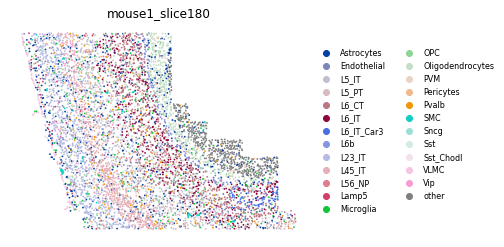

In [6]:
sc.pl.spatial(ad_sp1, img_key=None, color=['subclass'], title=['mouse1_slice180'], 
                      legend_fontsize=8,show=True, frameon=False, colorbar_loc=None, spot_size=20, 
                     legend_loc = 'right margin') ## size=1.5, legend_loc='on data',

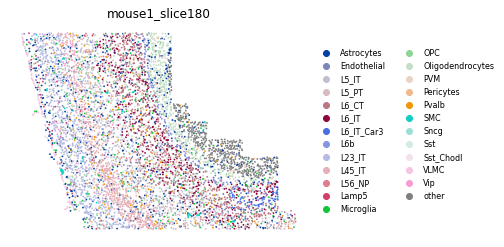

In [7]:
sc.pl.spatial(ad_sp1, img_key=None, color=['subclass'], title=['mouse1_slice180'], 
                      legend_fontsize=8,show=True, frameon=False, colorbar_loc=None, spot_size=20, 
                     legend_loc = 'right margin') ## size=1.5, legend_loc='on data',

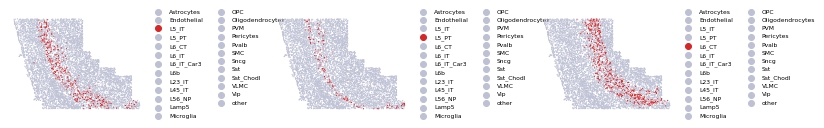

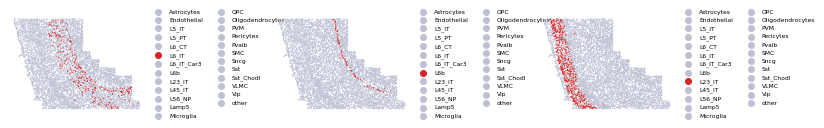

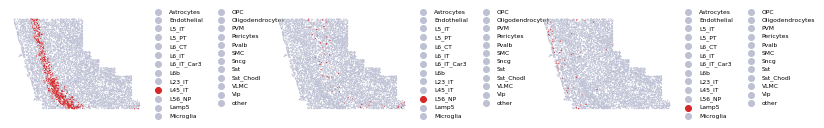

In [8]:
colors_use = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
              '#8c564b', '#e377c2', '#bcbd22', '#17becf', '#aec7e8',
              '#ffbb78', '#98df8a', '#ff9896', '#bec1d4', '#bb7784',
              '#0000ff', '#FFFF00', '#800080', '#e07b91',
              '#959595', '#7d87b9', '#d6bcc0', 
              '#8e063b', '#4a6fe3', '#8595e1', '#b5bbe3', '#e6afb9',
              '#d33f6a', '#11c638', '#8dd593', '#c6dec7', '#ead3c6', '#f0b98d',
              '#ef9708', '#0fcfc0', '#9cded6', '#d5eae7', '#f3e1eb', '#f6c4e1',
              '#111010', '#f79cd4']

# ad_sp1.uns['subclass_colors'] = ['#bec1d4']*len(ad_sp1.obs['subclass'].unique())
# #[colors_use[i] for i in range(len(ad_sp1.obs['subclass'].unique()))]

# import matplotlib.pyplot as plt
# plt.rcParams["figure.figsize"] = (2.5, 2.5)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 3, figsize=(12, 3), gridspec_kw={'wspace': 0.9, 'hspace': 0.2})

jj=0
for ii in [2,3,4]:
    ad_sp1.uns['subclass_colors'] = ['#bec1d4']*len(ad_sp1.obs['subclass'].unique())
    #[colors_use[i] for i in range(len(ad_sp1.obs['subclass'].unique()))]    
    ad_sp1.uns['subclass_colors'][ii] = '#d62728'
    sc.pl.spatial(ad_sp1, img_key=None, color=['subclass'], title=[''], 
                          legend_fontsize=6,show=False, frameon=False, colorbar_loc=None, spot_size=30, 
                         legend_loc = 'right margin',ax=ax[jj]) ## size=1.5, legend_loc='on data',
    jj= jj+1
plt.show()

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 3, figsize=(12, 3), gridspec_kw={'wspace': 0.9, 'hspace': 0.2})
jj=0
for ii in [5,7,8]:
    ad_sp1.uns['subclass_colors'] = ['#bec1d4']*len(ad_sp1.obs['subclass'].unique())
    #[colors_use[i] for i in range(len(ad_sp1.obs['subclass'].unique()))]    
    ad_sp1.uns['subclass_colors'][ii] = '#d62728'
    sc.pl.spatial(ad_sp1, img_key=None, color=['subclass'], title=[''], 
                          legend_fontsize=6,show=False, frameon=False, colorbar_loc=None, spot_size=30, 
                         legend_loc = 'right margin',ax=ax[jj]) ## size=1.5, legend_loc='on data',
    jj= jj+1
plt.show()

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 3, figsize=(12, 3), gridspec_kw={'wspace': 0.9, 'hspace': 0.2})
jj=0
for ii in [9,10,11]:
    ad_sp1.uns['subclass_colors'] = ['#bec1d4']*len(ad_sp1.obs['subclass'].unique())
    #[colors_use[i] for i in range(len(ad_sp1.obs['subclass'].unique()))]    
    ad_sp1.uns['subclass_colors'][ii] = '#d62728'
    sc.pl.spatial(ad_sp1, img_key=None, color=['subclass'], title=[''], 
                          legend_fontsize=6,show=False, frameon=False, colorbar_loc=None, spot_size=30, 
                         legend_loc = 'right margin',ax=ax[jj]) ## size=1.5, legend_loc='on data',
    jj= jj+1
plt.show()

In [9]:
ad_sp1

AnnData object with n_obs × n_vars = 6264 × 254
    obs: 'fovID', 'fov_x', 'fov_y', 'volume', 'center_x', 'center_y', 'slice_id', 'sample_id', 'label', 'subclass', 'class_label', 'cell_id', 'x', 'y'
    var: 'n_iso'
    uns: 'subclass_colors'
    obsm: 'spatial'
    layers: 'X', 'log1p', 'norm'

In [4]:
ad_sc = sc.read_h5ad("/mnt/disk1/xiaojk/data/mousebrain/mousebrain_genescore_matrix.h5ad")
ad_sc1 = sc.read_h5ad("/mnt/disk1/xzhou/code/pycharm_project/GLUE-master/data/download/Chen-2019/Chen-2019-ATAC.h5ad")

In [6]:
ad_sc

AnnData object with n_obs × n_vars = 6562 × 24333
    obs: 'cell_type'
    var: 'features'

In [62]:
ad_sc1.obs_names = [name.replace("_ATAC", "") for name in ad_sc1.obs_names]
ad_sc1.obs

# 获取 ad_sc1 和 ad_sc 的 obs_names
obs_names_ad_sc1 = ad_sc1.obs_names
obs_names_ad_sc = ad_sc.obs_names

# 找到匹配的观测值
matching_obs = set(obs_names_ad_sc1).intersection(obs_names_ad_sc)
print("匹配到的数据总数量：", len(matching_obs))
# 遍历匹配的观测值，将 cell_type 赋值给 ad_sc
for obs_name in matching_obs:
    cell_type = ad_sc1.obs.loc[obs_name, 'cell_type']
    ad_sc.obs.loc[obs_name, 'celltype'] = cell_type

# 确保更新后的 celltype 列已经被赋值到 ad_sc
print(ad_sc.obs['celltype'])

匹配到的数据总数量： 6022
09L_CGGCTCCCAAGC           InS
09C_TCTAGACTACGC       E5Parm1
09E_ATCAGCTGGACC       E5Parm1
09I_GCAAGCAGAGAG      E4Thsd7a
09I_CGTAGCTTACCC       E5Parm1
                       ...    
09K_GATAGAACTGGA        E6Tle4
09L_AACGATTATCAA     E2Rasgrf2
09L_TGTACGGAGCGA     E2Rasgrf2
09L_TTTAAGGACGCC    E4Il1rapl2
09I_TGCACCGGAATT        E6Tle4
Name: celltype, Length: 6562, dtype: object


In [61]:
list(ad_sc.obs['celltype'].unique())

['InS',
 'E5Parm1',
 'E4Thsd7a',
 'E6Tle4',
 'Clau',
 'E4Il1rapl2',
 nan,
 'InV',
 'E2Rasgrf2',
 'E5Galnt14',
 'E3Rmst',
 'InP',
 'OliM',
 'Mic',
 'E5Sulf1',
 'E3Rorb',
 'Peri',
 'InN',
 'Ast',
 'E5Tshz2',
 'OliI',
 'OPC',
 'Endo']

In [12]:
np.unique(ad_sc.X.toarray()[0, :])

array([ 0.   ,  0.103,  0.123, ..., 13.252, 13.704, 84.268])

In [13]:
ad_sc.obs.cell_type.value_counts()

cell_type
L2/3 IT      1861
L4           1704
L6 IT        1063
L5 CT         822
L5 PT         311
Pvalb         172
Sst           123
Astro         109
Vip/Lamp5     101
Oligo         100
L6 IT.2        78
L6b            66
NP             52
Name: count, dtype: int64

In [14]:
sc.pp.normalize_total(ad_sc)

In [15]:
ad_sc.obs['subclass_label'] = ad_sc.obs.cell_type

In [16]:
ad_sp1.var

,n_iso
1700022I11Rik,5
1810046K07Rik,2
5031425F14Rik,1
5730522E02Rik,8
Acta2,1
...,...
Sst,1
Rab3b,4
Slc17a7,5
Penk,2


In [17]:
ad_sc.obs.subclass_label.value_counts()

subclass_label
L2/3 IT      1861
L4           1704
L6 IT        1063
L5 CT         822
L5 PT         311
Pvalb         172
Sst           123
Astro         109
Vip/Lamp5     101
Oligo         100
L6 IT.2        78
L6b            66
NP             52
Name: count, dtype: int64

In [18]:
sc.tl.rank_genes_groups(ad_sc, groupby="cell_type", use_raw=False)
markers_df = pd.DataFrame(ad_sc.uns["rank_genes_groups"]["names"]).iloc[0:100, :]
markers = list(np.unique(markers_df.melt().value.values))
len(markers)

1062

In [19]:
ad_sp1.obs

,fovID,fov_x,fov_y,volume,center_x,center_y,slice_id,sample_id,label,subclass,class_label,cell_id,x,y
112,304,4441.37,-5311.0,1610.125042,4504.074901,-5139.325004,mouse1_slice180,dataset1_sample4,L6_CT_1,L6_CT,Glutamatergic,112,4504.074901,-5139.325004
129,308,4641.37,-5111.0,240.272125,4734.104400,-5094.105000,mouse1_slice180,dataset1_sample4,Oligo_1,Oligodendrocytes,Other,129,4734.104400,-5094.105000
139,292,4241.37,-3911.0,1022.756589,4412.747898,-3793.716003,mouse1_slice180,dataset1_sample4,L45_IT_SSp_2,L45_IT,Glutamatergic,139,4412.747898,-3793.716003
156,359,6241.37,-3511.0,1225.880689,6381.682899,-3303.409505,mouse1_slice180,dataset1_sample4,Pvalb_1,Pvalb,GABAergic,156,6381.682899,-3303.409505
209,333,5041.37,-3711.0,975.904580,5160.591399,-3519.105505,mouse1_slice180,dataset1_sample4,L5_IT_4,L5_IT,Glutamatergic,209,5160.591399,-3519.105505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280117,271,3841.37,-3911.0,458.633073,4044.684897,-3878.790501,mouse1_slice180,dataset1_sample4,L23_IT_3,L23_IT,Glutamatergic,280117,4044.684897,-3878.790501
280119,295,4441.37,-3511.0,105.631946,4478.187401,-3392.408003,mouse1_slice180,dataset1_sample4,Astro_1,Astrocytes,Other,280119,4478.187401,-3392.408003
280138,262,3641.37,-5511.0,555.972497,3841.578398,-5446.363002,mouse1_slice180,dataset1_sample4,L45_IT_1,L45_IT,Glutamatergic,280138,3841.578398,-5446.363002
280160,346,5641.37,-3511.0,1719.962149,5753.942400,-3421.020502,mouse1_slice180,dataset1_sample4,L5_IT_4,L5_IT,Glutamatergic,280160,5753.942400,-3421.020502


In [20]:
tg.pp_adatas(ad_sc, ad_sp1, genes=markers)

INFO:root:81 training genes are saved in `uns``training_genes` of both single cell and spatial Anndatas.
INFO:root:254 overlapped genes are saved in `uns``overlap_genes` of both single cell and spatial Anndatas.
INFO:root:uniform based density prior is calculated and saved in `obs``uniform_density` of the spatial Anndata.
INFO:root:rna count based density prior is calculated and saved in `obs``rna_count_based_density` of the spatial Anndata.


In [21]:
assert ad_sc.uns['training_genes'] == ad_sp1.uns['training_genes']

In [23]:
ad_map = tg.map_cells_to_space(
    adata_sc=ad_sc,
    adata_sp=ad_sp1,
    #device='cpu',
    device='cuda:1',
)

INFO:root:Allocate tensors for mapping.
INFO:root:Begin training with 81 genes and rna_count_based density_prior in cells mode...
INFO:root:Printing scores every 100 epochs.


Score: 0.329, KL reg: 0.095
Score: 0.895, KL reg: 0.004
Score: 0.905, KL reg: 0.003
Score: 0.907, KL reg: 0.003
Score: 0.907, KL reg: 0.003
Score: 0.908, KL reg: 0.003
Score: 0.908, KL reg: 0.003
Score: 0.908, KL reg: 0.003
Score: 0.908, KL reg: 0.003
Score: 0.909, KL reg: 0.003


INFO:root:Saving results..


In [24]:
ad_map

AnnData object with n_obs × n_vars = 6562 × 6264
    obs: 'cell_type', 'subclass_label'
    var: 'fovID', 'fov_x', 'fov_y', 'volume', 'center_x', 'center_y', 'slice_id', 'sample_id', 'label', 'subclass', 'class_label', 'cell_id', 'x', 'y', 'uniform_density', 'rna_count_based_density'
    uns: 'train_genes_df', 'training_history'

In [25]:
def construct_obs_plot(df_plot, adata, perc=0, suffix=None):
    # clip
    df_plot = df_plot.clip(df_plot.quantile(perc), df_plot.quantile(1 - perc), axis=1)

    # normalize
    df_plot = (df_plot - df_plot.min()) / (df_plot.max() - df_plot.min())

    if suffix:
        df_plot = df_plot.add_suffix(" ({})".format(suffix))
    adata.obs = pd.concat([adata.obs, df_plot], axis=1)
    
    
def plot_cell_annotation_sc(
    adata_sp, 
    annotation_list, 
    x="x", 
    y="y", 
    spot_size=None, 
    scale_factor=None, 
    perc=0,
    alpha_img=1.0,
    bw=False,
    ax=None
):
        
    # remove previous df_plot in obs
    adata_sp.obs.drop(annotation_list, inplace=True, errors="ignore", axis=1)

    # construct df_plot
    df = adata_sp.obsm["tangram_ct_pred"][annotation_list]
    construct_obs_plot(df, adata_sp, perc=perc)
    
    #non visium data 
    if 'spatial' not in adata_sp.obsm.keys():
        #add spatial coordinates to obsm of spatial data 
        coords = [[x,y] for x,y in zip(adata_sp.obs[x].values,adata_sp.obs[y].values)]
        adata_sp.obsm['spatial'] = np.array(coords)
    
    if 'spatial' not in adata_sp.uns.keys() and spot_size == None and scale_factor == None:
        raise ValueError("Spot Size and Scale Factor cannot be None when ad_sp.uns['spatial'] does not exist")
    
    #REVIEW
    if 'spatial' in adata_sp.uns.keys() and spot_size != None and scale_factor != None:
        raise ValueError("Spot Size and Scale Factor should be None when ad_sp.uns['spatial'] exists")
    
    sc.pl.spatial(
        adata_sp, color=annotation_list, cmap="viridis", show=False, frameon=False, spot_size=spot_size,
        scale_factor=scale_factor, alpha_img=alpha_img, bw=bw, ax=ax, colorbar_loc=None,ncols=5,wspace=0
    )

    adata_sp.obs.drop(annotation_list, inplace=True, errors="ignore", axis=1)

In [26]:
list(ad_sc.obs.subclass_label.unique())

['Sst',
 'L5 PT',
 'L4',
 'L5 CT',
 'L6 IT.2',
 'L6 IT',
 'L2/3 IT',
 'Oligo',
 'NP',
 'Vip/Lamp5',
 'Pvalb',
 'L6b',
 'Astro']

INFO:root:spatial prediction dataframe is saved in `obsm` `tangram_ct_pred` of the spatial AnnData.


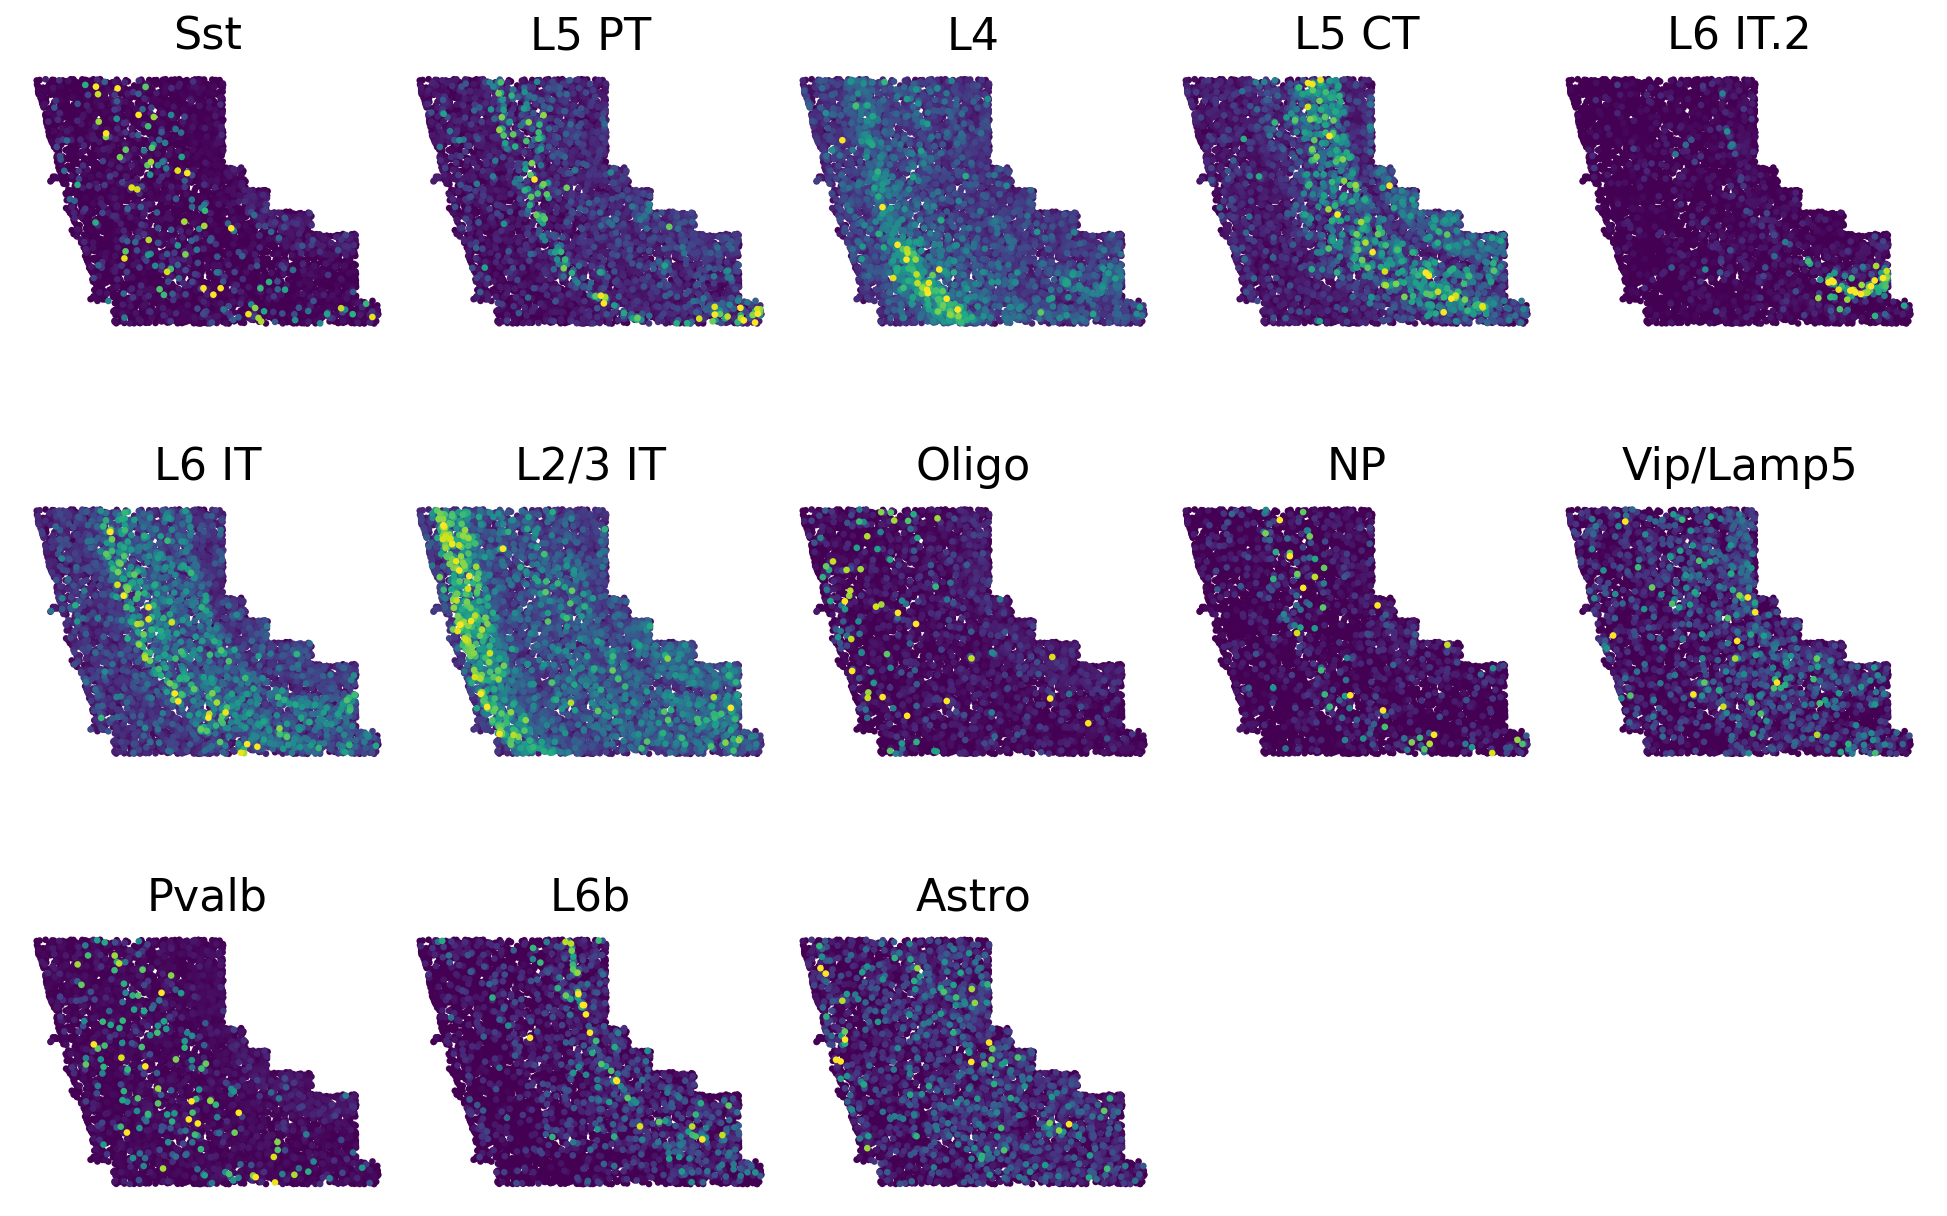

In [30]:
tg.project_cell_annotations(ad_map, ad_sp1, annotation='subclass_label') 
##这里由于是FISH数据，每个spot都会对应一个细胞，如果是Visium，则需要对应多个细胞

annotation_list = ['Sst',
 'L5 PT',
 'L4',
 'L5 CT',
 'L6 IT.2',
 'L6 IT',
 'L2/3 IT',
 'Oligo',
 'NP',
 'Vip/Lamp5',
 'Pvalb',
 'L6b',
 'Astro']
sc.settings.set_figure_params(frameon=True, fontsize=20, facecolor='white',figsize=(3, 3)) #dpi=300, 
# import tangram as tg
plot_cell_annotation_sc(ad_sp1, annotation_list, x='x', y='y', spot_size= 60, scale_factor=0.1, perc=0.001)

In [28]:
ad_map.uns['train_genes_df']

,train_score,sparsity_sc,sparsity_sp,sparsity_diff
sox10,0.991790,0.987809,0.839080,-0.148728
gad2,0.990096,0.980037,0.538155,-0.441882
slc32a1,0.987858,0.978055,0.808110,-0.169946
lhx6,0.977491,0.975770,0.929278,-0.046491
opalin,0.974133,0.980494,0.893359,-0.087135
...,...,...,...,...
col15a1,0.833316,0.721731,0.843550,0.121819
unc5d,0.826891,0.472417,0.625000,0.152583
alk,0.825176,0.715483,0.905651,0.190168
sgcd,0.799649,0.665803,0.918902,0.253099


In [29]:
ad_ge = tg.project_genes(adata_map=ad_map, adata_sc=adata_sc)
ad_ge

NameError: name 'adata_sc' is not defined

In [31]:
ad_map

AnnData object with n_obs × n_vars = 6562 × 6264
    obs: 'cell_type', 'subclass_label'
    var: 'fovID', 'fov_x', 'fov_y', 'volume', 'center_x', 'center_y', 'slice_id', 'sample_id', 'label', 'subclass', 'class_label', 'cell_id', 'x', 'y', 'uniform_density', 'rna_count_based_density'
    uns: 'train_genes_df', 'training_history'

In [32]:
ad_sc = sc.read_h5ad("/mnt/disk1/xzhou/code/pycharm_project/GLUE-master/data/download/Chen-2019/Chen-2019-RNA.h5ad")

In [33]:
ad_sc

AnnData object with n_obs × n_vars = 9190 × 28930
    obs: 'domain', 'cell_type'

In [34]:
aatac = sc.read_h5ad("/mnt/disk1/xzhou/code/pycharm_project/GLUE-master/data/download/Chen-2019/Chen-2019-ATAC.h5ad")

In [35]:
aatac

AnnData object with n_obs × n_vars = 9190 × 241757
    obs: 'domain', 'cell_type'